In [1]:
import numpy as np
from qiskit import Aer, execute, QuantumCircuit, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.extensions import Initialize
import matplotlib.pyplot as plt
from qiskit_textbook.tools import random_state
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

provider=IBMQ.load_account()

In [2]:
## In our implementation, we are going to work with 4 qubit registers where we 
#will search for an element from 0 to 2^4-1
n=4
grover_qc= QuantumCircuit(n+1, n)
marker= [1,1,0,1] #our marker is 3-> 0011 but since lsb=>msb, its flipped

In [3]:
# here our oracle will operate as Uf|x>|y>= |x>|y+f(x)>; where f(x)=1 if x is marked, otherwise 0
def oracle(n, marker, qc):
    control0= [i for i in range(n) if not marker[i]]
    qc.x(control0)
    qc.mct(list(range(n)), n) #mutli control toffoli
    qc.x(control0)
    qc.draw()
           

In [4]:
# function for rotation
def rotate(n, qc):
    qc.h(list(range(n)))
    qc.x(list(range(n)))
    qc.mct(list(range(n)), n)
    qc.x(list(range(n+1)))
    qc.h(list(range(n)))
    

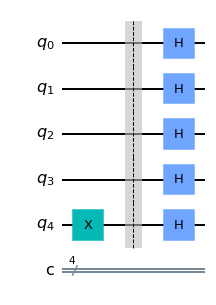

In [5]:
#lets draw the circuit
grover_qc.x(n)
grover_qc.barrier()
grover_qc.h(list(range(n+1)))
grover_qc.draw()

In [6]:
##lets run the circuit, we obtain a statevector and keep first n qubits and leave the |-> ancilla qubit as it is
backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

In [7]:
##next ain is to plot this on a 2D plane spanned by marked vector |a> and superposition of unmarked vectors |e>
marker=[1,1,0,1]
ket_a= np.zeros(2**n)
ket_a[11]=1
ket_e= (np.ones(2**n) - ket_a)/ np.sqrt(2**n-1)
print(ket_a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
print(ket_e)

[0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889
 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.
 0.25819889 0.25819889 0.25819889 0.25819889]


In [9]:
def project(psi, a, e):
    return [np.real(np.vdot(e, psi)), np.real(np.vdot(a, psi))]

def plt_vector( proj, axes=[0.0, 1.0, 0.0, 1.0]):
    x_pos, y_pos, x_direct, y_direct= 0,0, proj[0], proj[1]
    #creating plot
    fig, ax=plt.subplots()
    ax.quiver(x_pos, y_pos, x_direct, y_direct, scale=1.0)
    ax.axis(axes)
    plt.show()
    

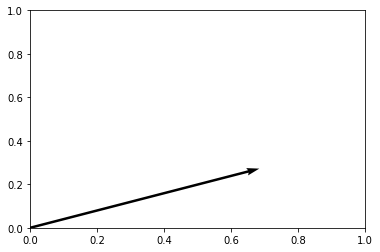

In [10]:
proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

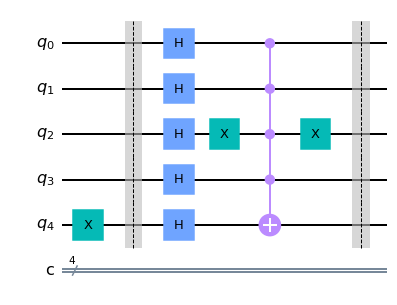

In [11]:
oracle(4, marker, grover_qc)
grover_qc.barrier()
grover_qc.draw()

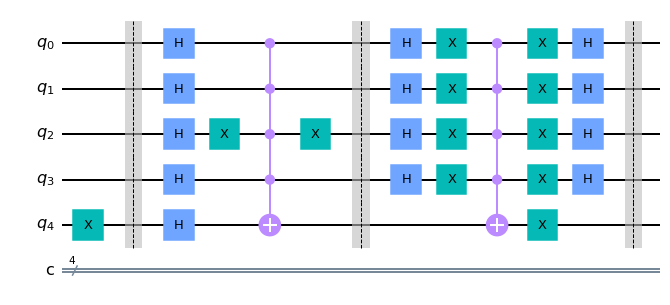

In [12]:
rotate(n, grover_qc)
grover_qc.barrier()
grover_qc.draw()

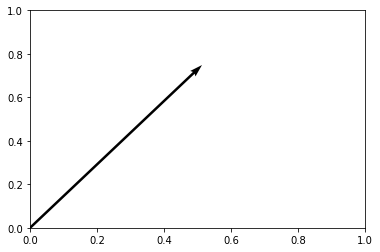

In [13]:
##Now we run the circuit again and plot the statevector

backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

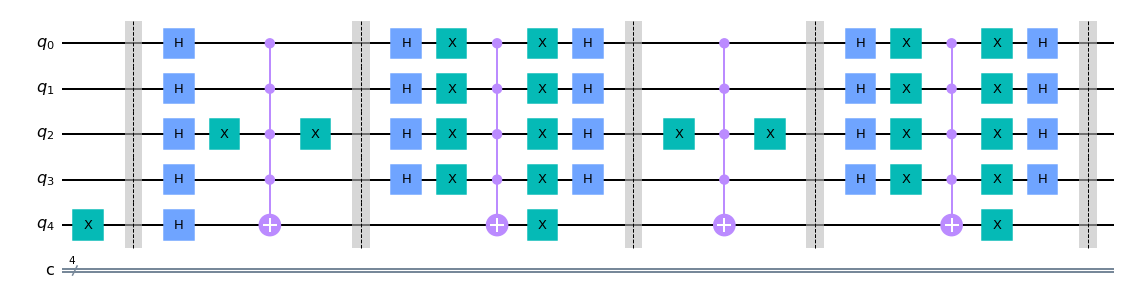

In [14]:
##applying on more layer of oracle and rotation
oracle(4, marker, grover_qc)
grover_qc.barrier()
rotate(n, grover_qc)
grover_qc.barrier()
grover_qc.draw()

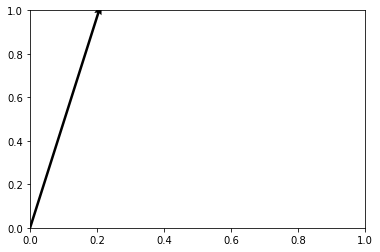

In [15]:
##Now we run the circuit again and plot the statevector

backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

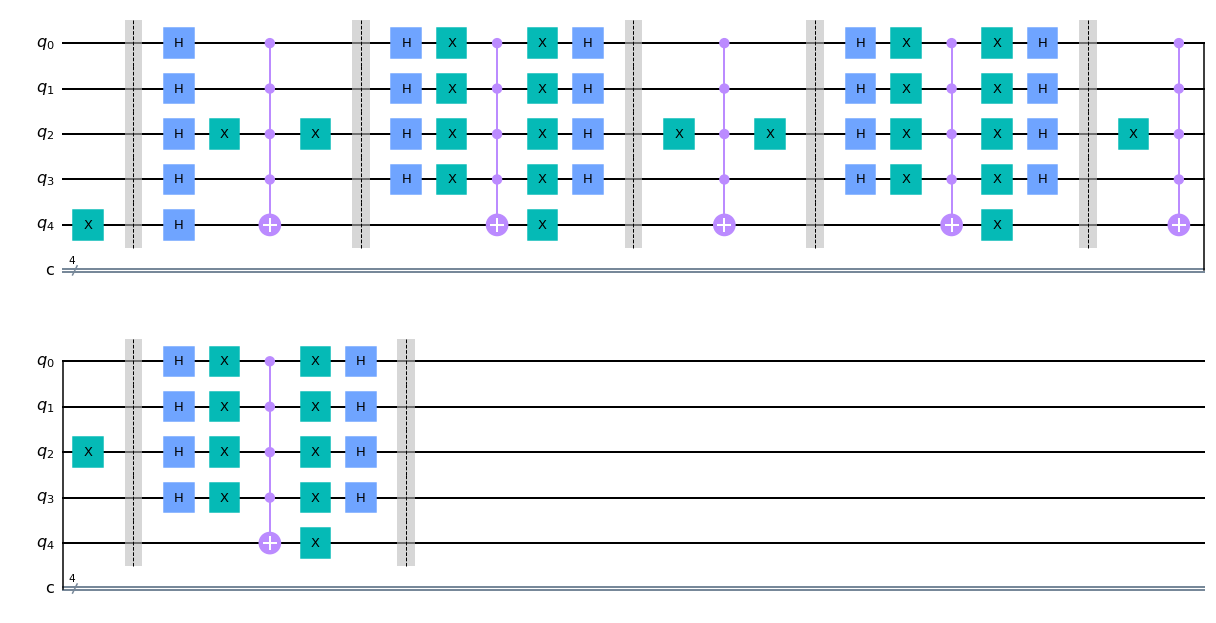

In [16]:
##applying on more layer of oracle and rotation
oracle(4, marker, grover_qc)
grover_qc.barrier()
rotate(n, grover_qc)
grover_qc.barrier()
grover_qc.draw()

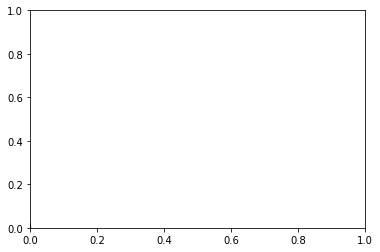

In [17]:
##Now we run the circuit again and plot the statevector

backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

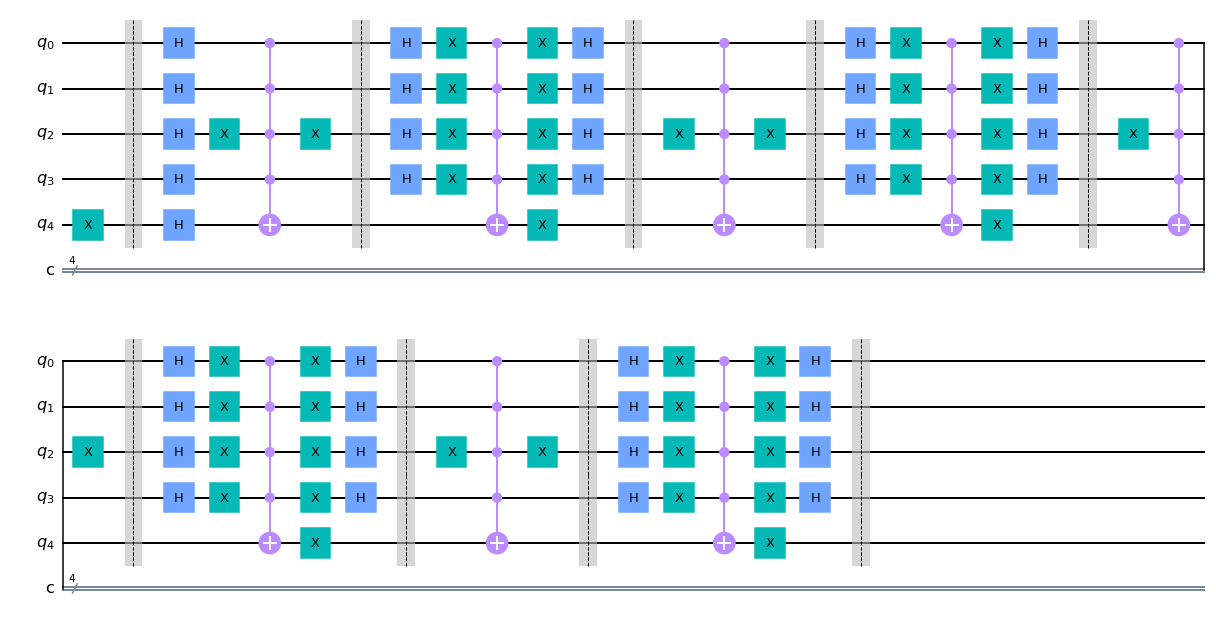

In [18]:
##applying on more layer of oracle and rotation
oracle(4, marker, grover_qc)
grover_qc.barrier()
rotate(n, grover_qc)
grover_qc.barrier()
grover_qc.draw()

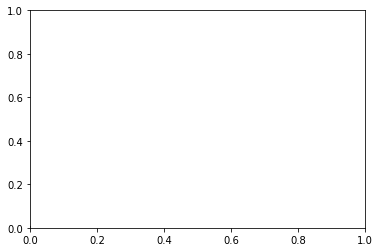

In [19]:
##Now we run the circuit again and plot the statevector

backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

In [20]:
print(statevector)
##clearly our search has converged

[-0.11808131+3.12133184e-16j -0.11808131+2.95558244e-16j
 -0.11808131+2.95558244e-16j -0.11808131+2.90822547e-16j
 -0.11808131+2.95558244e-16j -0.11808131+2.78983304e-16j
 -0.11808131+2.78983304e-16j -0.11808131+2.62408364e-16j
 -0.11808131+2.95558244e-16j -0.11808131+2.90822547e-16j
 -0.11808131+2.90822547e-16j  0.53930703-1.02096557e-15j
 -0.11808131+2.78983304e-16j -0.11808131+2.62408364e-16j
 -0.11808131+2.62408364e-16j -0.11808131+2.57672666e-16j]


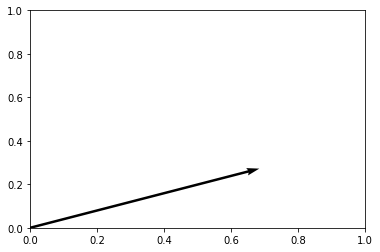

In [21]:
##calculating max value of T (number of rotations), so that last task of hit and trial can be AUTOMATED
##but first we need to calculate theta0
n=4
grover_qc= QuantumCircuit(n+1, n)
marker= [1,1,0,1]


grover_qc.x(n)
grover_qc.barrier()
grover_qc.h(list(range(n+1)))


backend= Aer.get_backend('statevector_simulator')
obj= assemble(grover_qc)
statevector= backend.run(obj).result().data()['statevector']
statevector=statevector[:2**n]

proj= project(statevector, ket_a, ket_e)
plt_vector(proj)

theta0= np.arccos( np.real(np.vdot(statevector, ket_e))/(np.sqrt(np.real(np.vdot(statevector, statevector)))*np.sqrt(np.real(np.vdot(ket_e, ket_e)))))

T=int( np.ceil (np.pi/(8*theta0) -0.5))

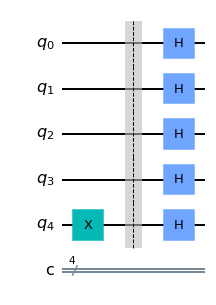

In [22]:
grover_qc.draw()

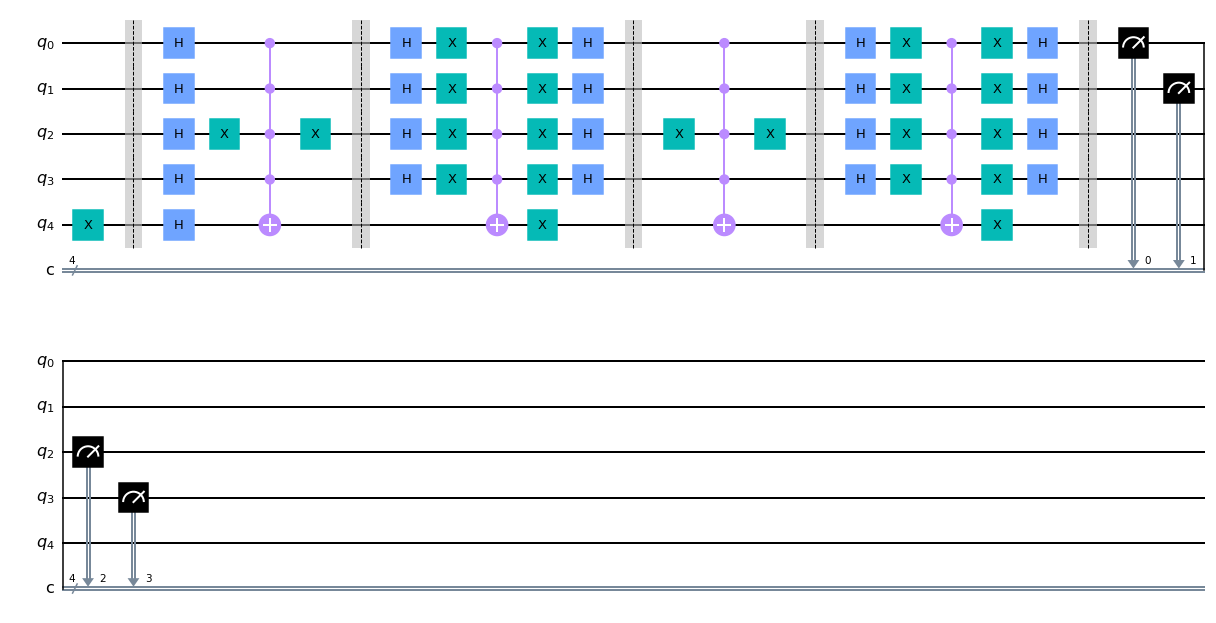

In [23]:
for i in range(T):
    oracle(4, marker, grover_qc)
    grover_qc.barrier()
    rotate(n, grover_qc)
    grover_qc.barrier()
    
for i in range(n):
    grover_qc.measure(i,i)
    
grover_qc.draw()

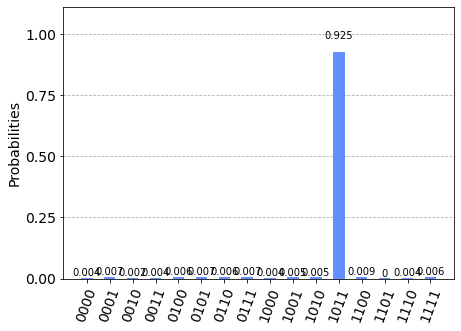

In [24]:
backend= Aer.get_backend('qasm_simulator')
result= backend.run(grover_qc).result().get_counts(grover_qc)
plot_histogram(result)


In [25]:
##this conclude database search using Grovers algorithm
## points to ponder about:
## what to do if more than one marked elements?? how will the algorithm change, initial angle and rotation in each step
###what if we do not know the number of marled elemts?? what modifications will be needed??